<a href="https://colab.research.google.com/github/Srinu2307/EduNet-Foundation-projects-/blob/main/Microsoft_Stock_Data_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/MSFT_1986-03-13_2025-02-04.csv")

In [ ]:
try:
    msft = yf.download("MSFT", start="2023-01-01")  # Download data
    print("Data downloaded successfully.")
except Exception as e:
    print(f"Error downloading data: {e}")
    exit()  # Exit if data download fails

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully.


## Basic Data Exploration and Analysis

In [ ]:
print(msft.head())
print(msft.info())
print(msft.describe())

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2023-01-03  235.711731  241.782108  233.566922  239.155220  25740000
2023-01-04  225.400925  229.110043  222.311624  228.529573  50623400
2023-01-05  218.720551  223.875950  218.179428  223.531595  39585600
2023-01-06  221.298233  222.114834  215.808342  219.399402  43613600
2023-01-09  223.452881  227.506369  222.754353  222.793701  27369800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524 entries, 2023-01-03 to 2025-02-04
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   524 non-null    float64
 1   (High, MSFT)    524 non-null    float64
 2   (Low, MSFT)     524 non-null    float64
 3   (Open, MSFT)    524 non-null    float64
 4   (Volume, MSFT)  524 non-null    int64  
dtypes: fl

# Calculate daily returns:

In [ ]:
msft = data
msft['Daily Return'] = msft['Adj Close'].pct_change()

# Calculate moving averages (e.g., 50-day and 200-day)

In [ ]:
msft['50-Day MA'] = msft['Adj Close'].rolling(window=50).mean()
msft['200-Day MA'] = msft['Adj Close'].rolling(window=200).mean()

#  Data Visualization
# Plot Adjusted Close Price

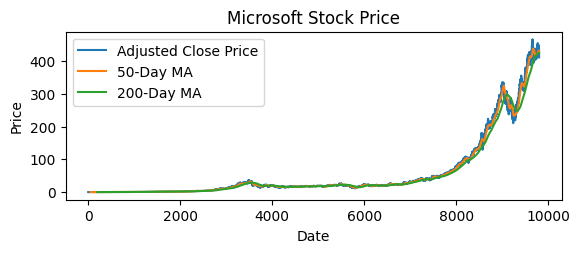

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(msft['Adj Close'], label='Adjusted Close Price')
plt.plot(msft['50-Day MA'], label='50-Day MA')
plt.plot(msft['200-Day MA'], label='200-Day MA')
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Daily Returns

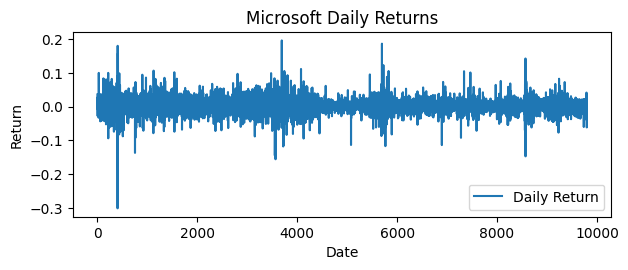

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(msft['Daily Return'], label='Daily Return')
plt.title('Microsoft Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()

plt.tight_layout()
plt.show()

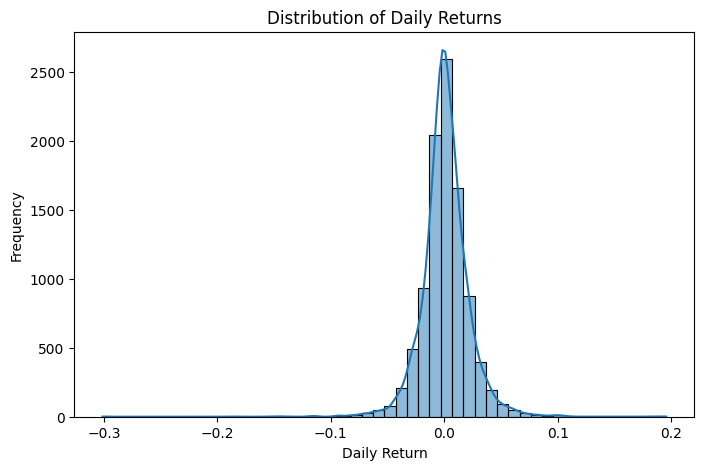

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(msft['Daily Return'], kde=True, bins=50) #using seaborn for better aesthetics
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

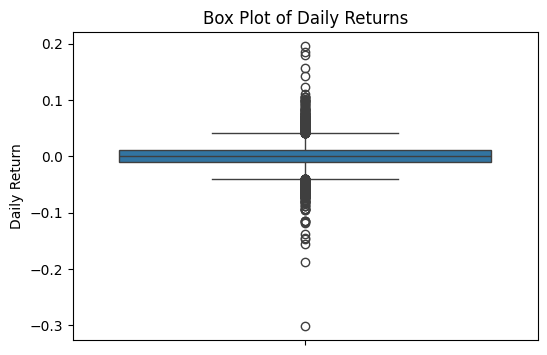

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=msft['Daily Return'])
plt.title('Box Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.show()


# Volatility (Standard Deviation of Daily Returns)


In [ ]:
volatility = msft['Daily Return'].std() * (252**0.5)
print(f"Annualized Volatility: {volatility:.4f}")

Annualized Volatility: 0.3338


# Sharpe Ratio (using a risk-free rate of 0 for simplicity)


In [ ]:
risk_free_rate = 0.0
sharpe_ratio = (msft['Daily Return'].mean() * 252 - risk_free_rate) / (msft['Daily Return'].std() * (252**0.5))
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Sharpe Ratio: 0.8484


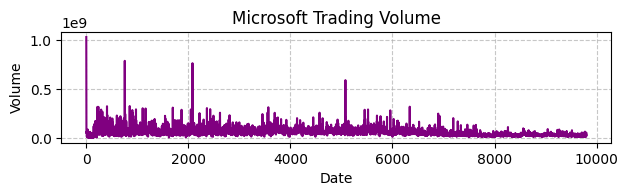

In [ ]:
plt.subplot(3, 1, 3)  # 3 rows, 1 column, plot 3
sns.lineplot(x=msft.index, y='Volume', data=msft, color='purple')
plt.title('Microsoft Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

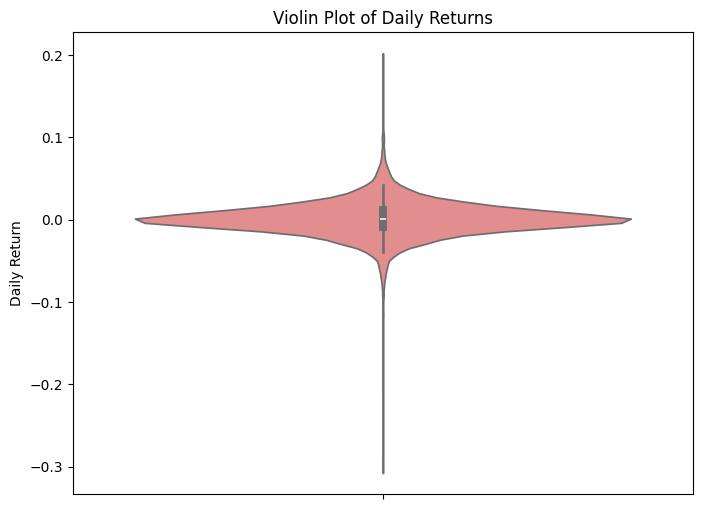

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=msft['Daily Return'].dropna(), color='lightcoral')
plt.title('Violin Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.show()

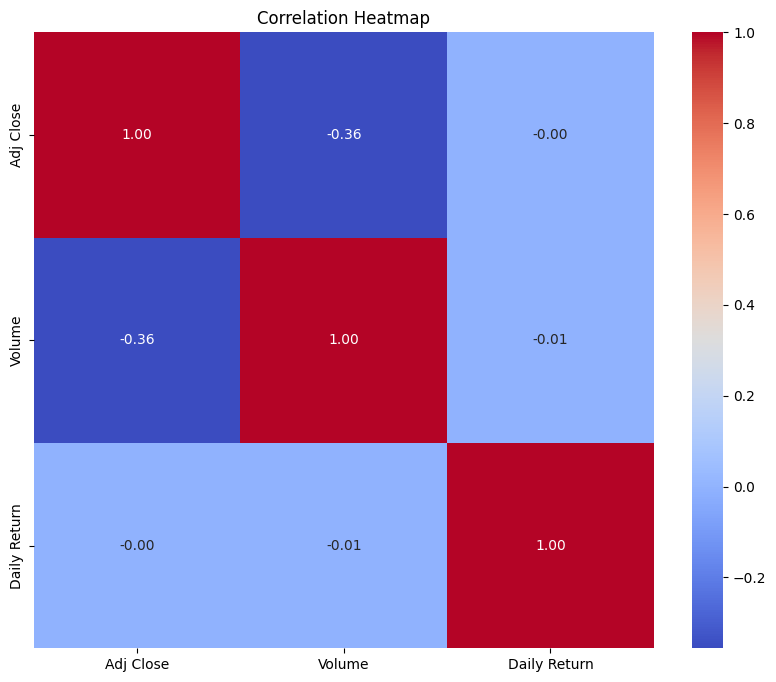

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = msft[['Adj Close', 'Volume', 'Daily Return']].corr() # Calculate correlation only for relevant columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

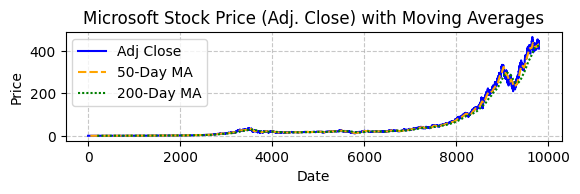

In [ ]:
plt.subplot(3, 1, 1)  # 3 rows, 1 column, plot 1
sns.lineplot(data=msft[['Adj Close', '50-Day MA', '200-Day MA']], palette=['blue', 'orange', 'green'])
plt.title('Microsoft Stock Price (Adj. Close) with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)

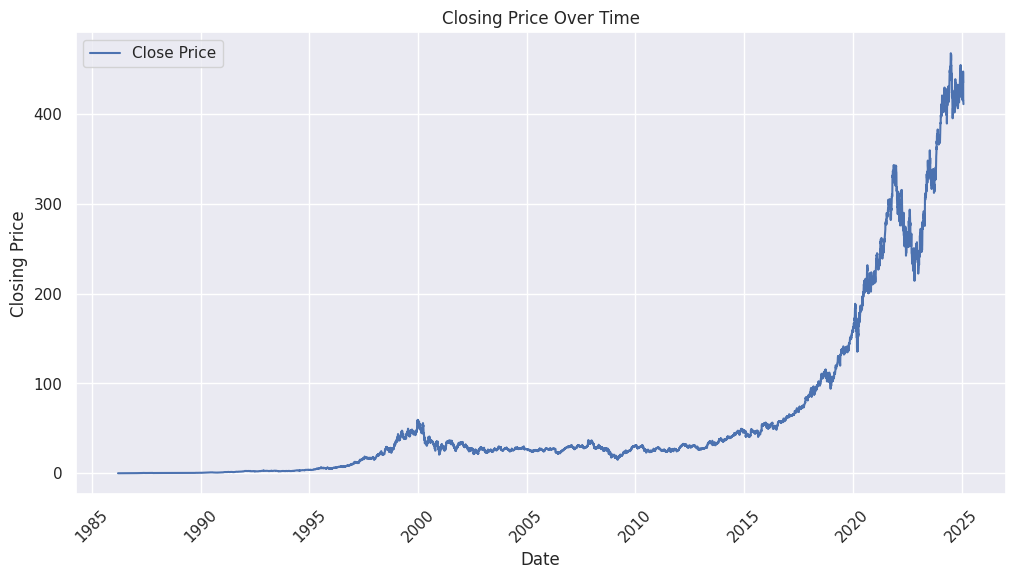

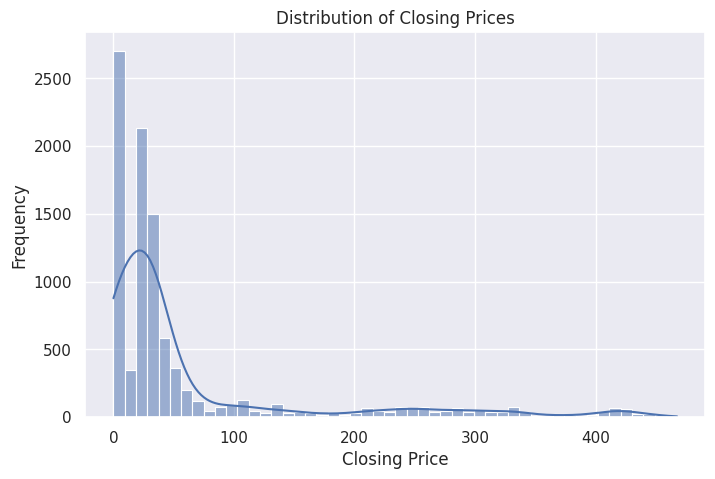

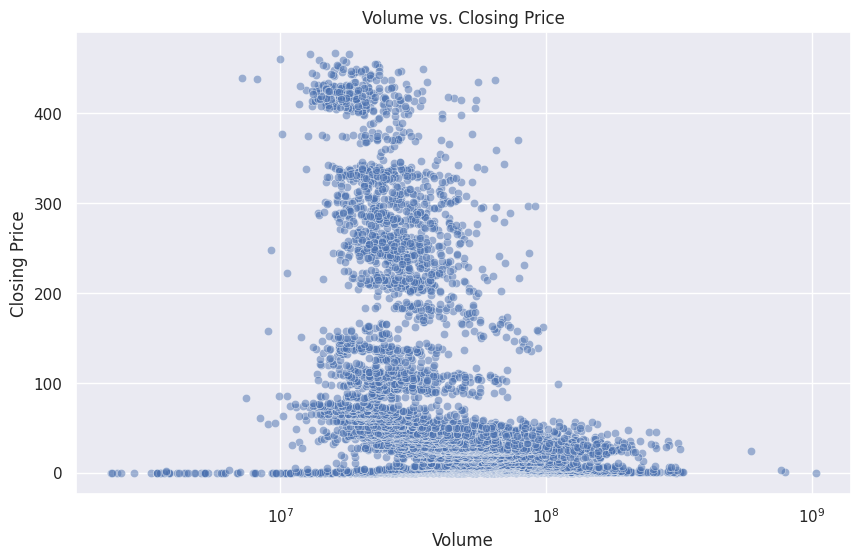

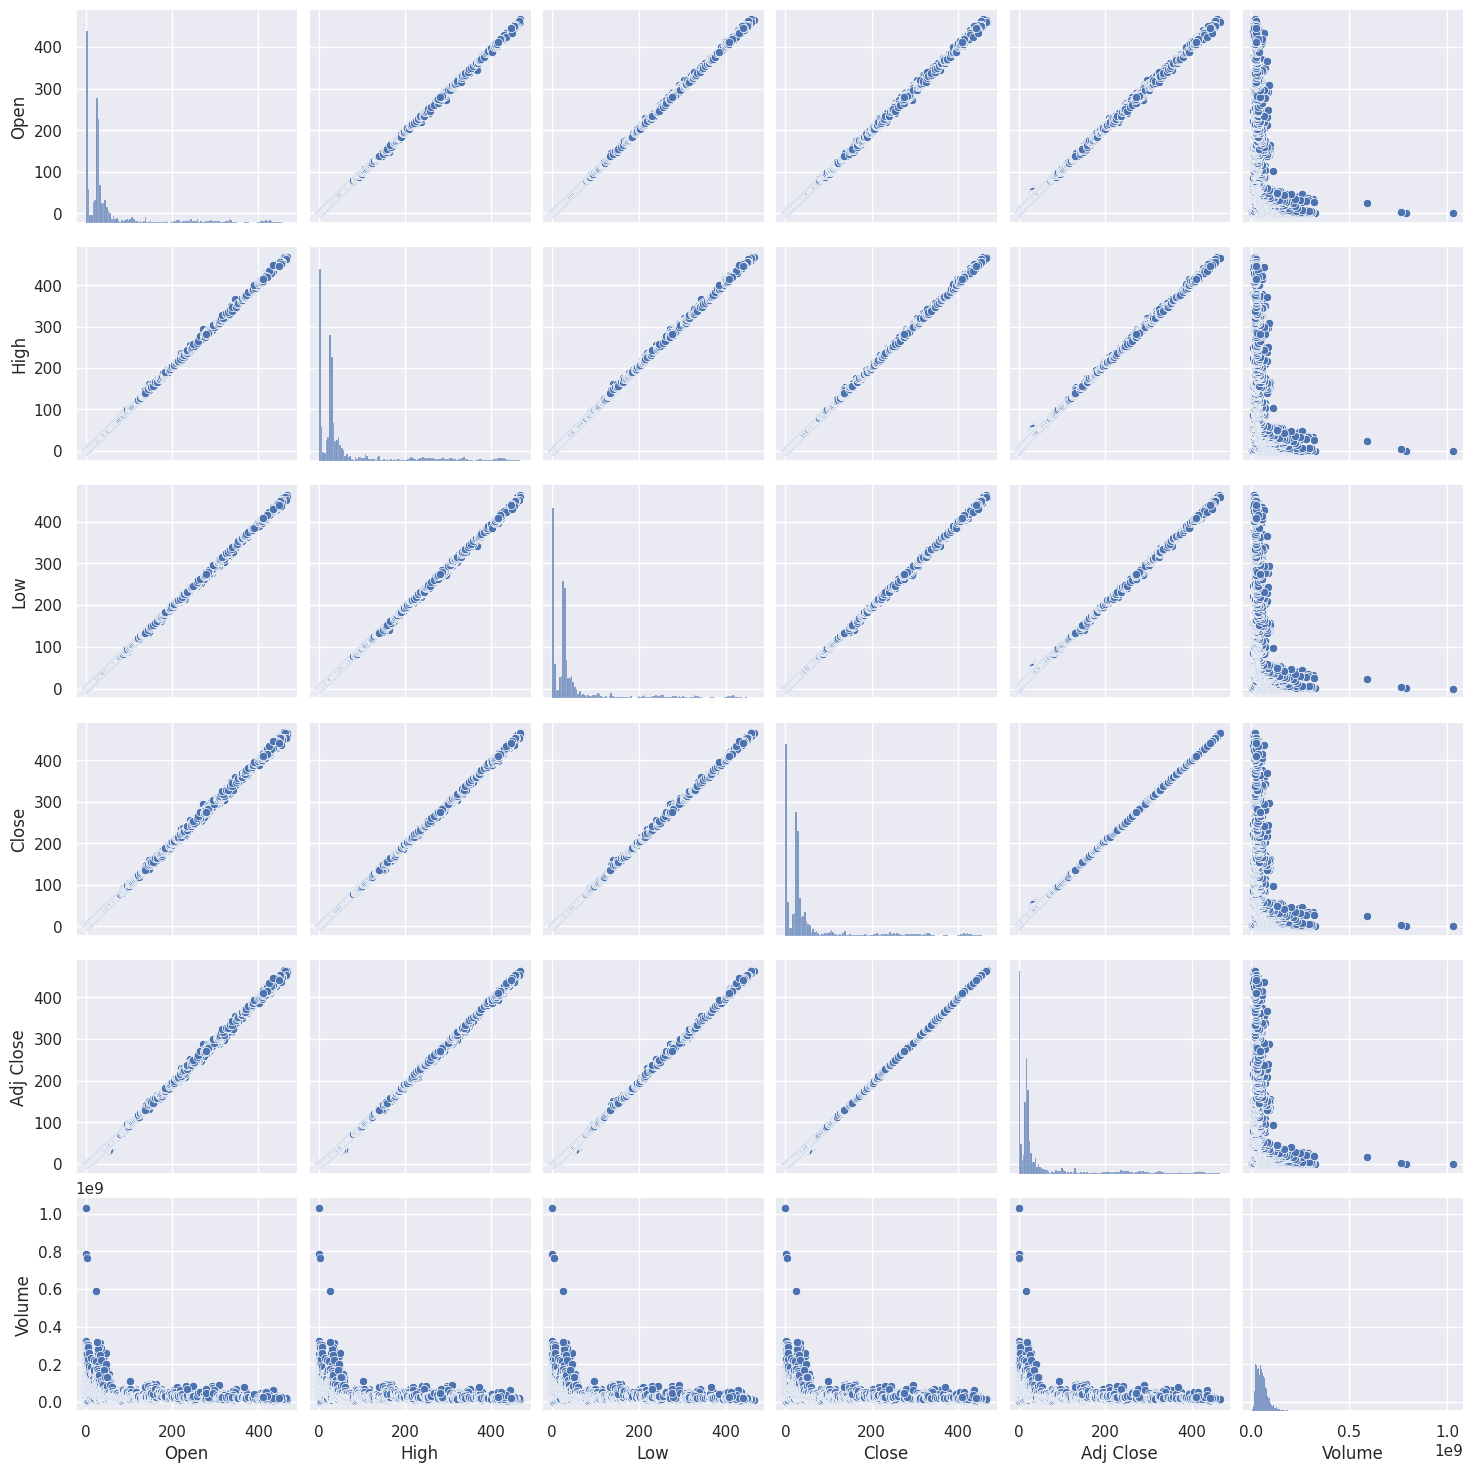

In [7]:
# Plot Closing Price over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=data["Date"], y=data["Close"], label="Close Price") # Use 'data' instead of 'df'
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.show()

# Distribution of Closing Prices
plt.figure(figsize=(8, 5))
sns.histplot(data["Close"], bins=50, kde=True) # Use 'data' instead of 'df'
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot of Volume vs. Closing Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Volume"], y=data["Close"], alpha=0.5) # Use 'data' instead of 'df'
plt.title("Volume vs. Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Pairplot for numerical columns
sns.pairplot(data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]) # Use 'data' instead of 'df'
plt.show()